In [1]:
# importing libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data= pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv")

In [3]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
data.shape

(1338, 7)

In [5]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
#missing values checking
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
# unique data
data.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [9]:
# Createing dataset for nominal data
n_data = data[['sex','children','smoker','region']]
n_data.head()

,sex,children,smoker,region
0,female,0,yes,southwest
1,male,1,no,southeast
2,male,3,no,southeast
3,male,0,no,northwest
4,male,0,no,northwest


In [10]:
#checking for unique categoriesz
column_names = n_data.columns
for column_name in column_names:
    print("Column Name        :", column_name)
    print("------------------------------------------")
    print(data[column_name].value_counts(normalize=True, dropna=False)*100)
    print('\n')

Column Name        : sex
------------------------------------------
male      50.523169
female    49.476831
Name: sex, dtype: float64


Column Name        : children
------------------------------------------
0    42.899851
1    24.215247
2    17.937220
3    11.733931
4     1.868460
5     1.345291
Name: children, dtype: float64


Column Name        : smoker
------------------------------------------
no     79.521674
yes    20.478326
Name: smoker, dtype: float64


Column Name        : region
------------------------------------------
southeast    27.204783
southwest    24.289985
northwest    24.289985
northeast    24.215247
Name: region, dtype: float64




<function matplotlib.pyplot.show(close=None, block=None)>

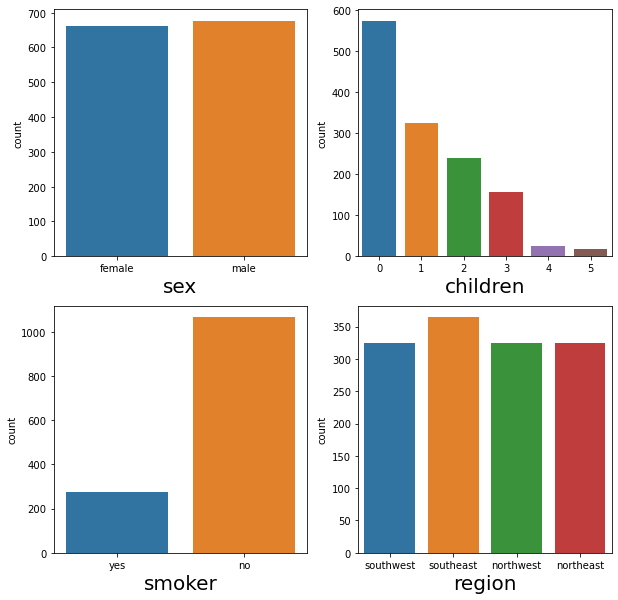

In [11]:
#Data Visualisation
#Univariate Analysis

plt.figure(figsize=(10,10))
plotnumber = 1
for column in n_data:
    if plotnumber <=4:
        ax= plt.subplot(2,2,plotnumber)
        sns.countplot(n_data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show

In [13]:
#From above graphs we observe
#The no. of male and female customers are almost equal
#Most of the customer have no childern and very few have 3 ,4 and 5 children
#Most of the customers are non-smokers
#Customers belong to all regions

In [14]:
# Creating Data Frame for continuous data
c_data = data[['age','bmi','charges']]
c_data.head()

,age,bmi,charges
0,19,27.900,16884.92400
1,18,33.770,1725.55230
2,28,33.000,4449.46200
3,33,22.705,21984.47061
4,32,28.880,3866.85520


<function matplotlib.pyplot.show(close=None, block=None)>

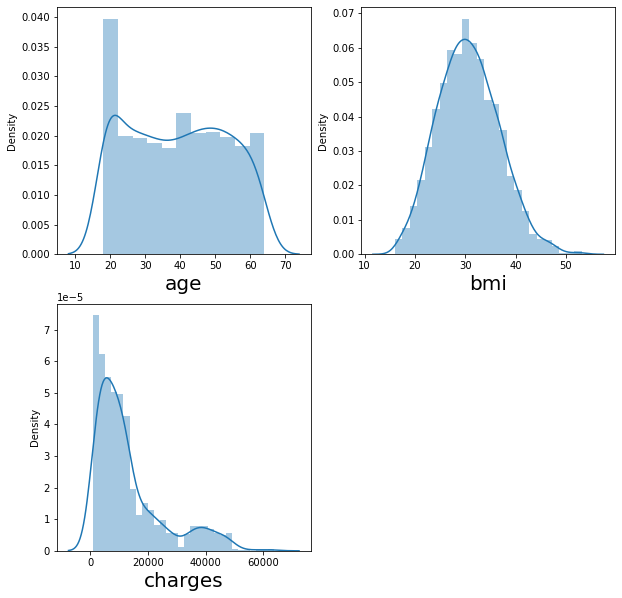

In [15]:
plt.figure(figsize=(10,10))
plotnumber = 1
for column in c_data:
    if plotnumber <=3:
        ax= plt.subplot(2,2,plotnumber)
        sns.distplot(c_data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show

In [16]:
#checking for skewness
c_data.skew()

age        0.055673
bmi        0.284047
charges    1.515880
dtype: float64

#From the above observation we conclude skewness for features is less than 0.5 and skewness in label
doesnt matter implies the n_data looks good

In [17]:
#Encoding careorical data:
L_encoder = LabelEncoder()

In [18]:
for i in data.columns:
    if data[i].dtypes=='object':
        data[i]=L_encoder.fit_transform(data[i].values.reshape(-1,1))

In [19]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [20]:
# Data is encoded

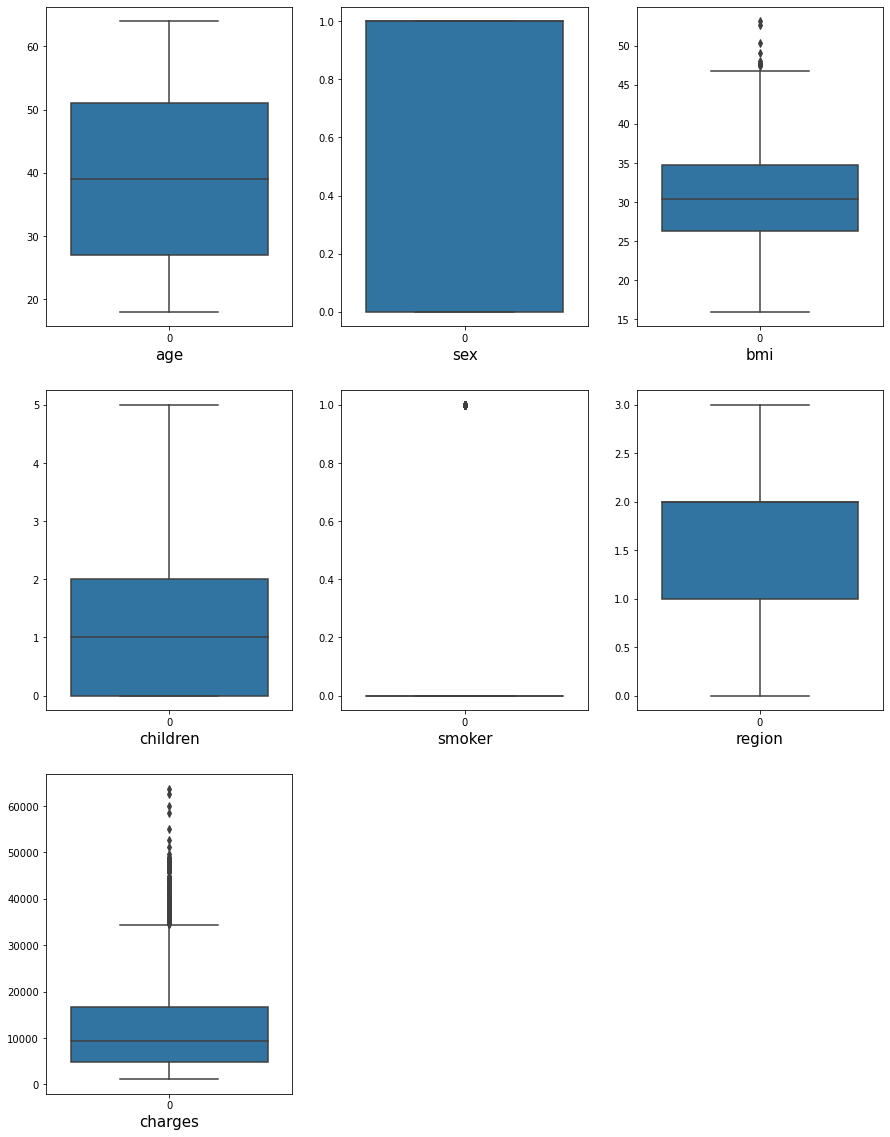

In [21]:
# Checking for outliers using boxplot
plt.figure(figsize=(15,20))
graph =1
for column in data:
    if graph <=7:
        plt.subplot(3,3,graph)
        ax=sns.boxplot(data=data[column])
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

#from the above graphs we can say that BMI and Somkers have outliers

In [22]:
#Treating outliers:
# z-score method
features=data.drop('charges',axis=1)
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(features))
threshold=3
outliers=np.where(z>3)
outliers

(array([  32,   71,  116,  166,  413,  425,  438,  568,  640,  847,  877,
         932,  937,  969,  984, 1047, 1085, 1116, 1130, 1245, 1272, 1317],
       dtype=int64),
 array([3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2],
       dtype=int64))

In [23]:
data=data.drop(outliers[0])
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [24]:
data.reset_index()

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,0,27.900,0,1,3,16884.92400
1,1,18,1,33.770,1,0,2,1725.55230
2,2,28,1,33.000,3,0,2,4449.46200
3,3,33,1,22.705,0,0,1,21984.47061
4,4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...,...
1311,1333,50,1,30.970,3,0,1,10600.54830
1312,1334,18,0,31.920,0,0,0,2205.98080
1313,1335,18,0,36.850,0,0,2,1629.83350
1314,1336,21,0,25.800,0,0,3,2007.94500


In [25]:
data_loss=((1338-1316)/1338)*100
data_loss

1.6442451420029895

#Since we are loosing about 1.7% of the data it seems wise to delete the outliers

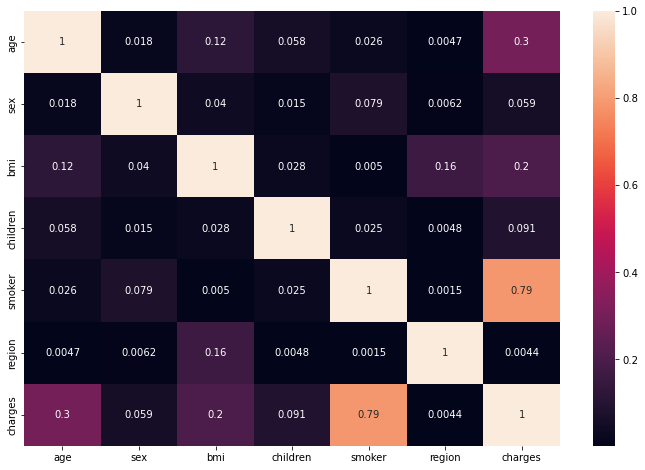

In [27]:
# Plotting heat map to check for multicollinerity and labelv//s feature relationship
df_corr = data.corr().abs()
plt.figure(figsize=(12,8))
sns.heatmap(df_corr, annot= True, annot_kws ={'size':10})
plt.show()

In [28]:
# looks like
#there is no multicollinearity between the features
#smoker, age and bmi have a strong relation with charges(label)
# also observe region has a very weak relation with charges

In [29]:
# Dividing data into feature and label
X= data.drop(columns=['charges'])
y= data['charges']

In [30]:
#Applying minmax scaler
mms = MinMaxScaler()
X_scaled = mms.fit_transform(X)

In [43]:
#traintestsplit
x_train,x_test,y_train,y_test = train_test_split (X_scaled,y, test_size=0.25, random_state = 12)

In [44]:
# Model Selection
def model_selection (algorithm, x_train , y_train,x_test,y_test):
    algorithm.fit(x_train,y_train)
    pred_train = algorithm.predict(x_train)
    pred_test = algorithm.predict(x_test)
    print ("Acuraccy of training model :",r2_score(y_train,pred_train))
    print ("Accuracy of testing model :",r2_score(y_test,pred_test))

In [45]:
#Linear Regression
lr= LinearRegression()

In [46]:
model_selection(lr,x_train,y_train,x_test,y_test)

Acuraccy of training model : 0.760034740122902
Accuracy of testing model : 0.7232671352835749


In [47]:
# Cross validation
pred_train = lr.predict(x_train)
pred_test = lr.predict(x_test)
Train_accuracy = r2_score(y_train,pred_train)
Test_accuracy= r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score

for i in range (2,10):
    cv_score=cross_val_score(lr,X_scaled,y,cv=i)
    cv_mean=cv_score.mean()
    print (f"At cross fold {i} the cv_score is {cv_mean}, training accuracy is {Train_accuracy} and testing accuracy is {Test_accuracy}")
    print ("\n")

At cross fold 2 the cv_score is 0.7487666274306177, training accuracy is 0.760034740122902 and testing accuracy is 0.7232671352835749


At cross fold 3 the cv_score is 0.7449726511284571, training accuracy is 0.760034740122902 and testing accuracy is 0.7232671352835749


At cross fold 4 the cv_score is 0.7461079357315701, training accuracy is 0.760034740122902 and testing accuracy is 0.7232671352835749


At cross fold 5 the cv_score is 0.7471508430420551, training accuracy is 0.760034740122902 and testing accuracy is 0.7232671352835749


At cross fold 6 the cv_score is 0.745880735608032, training accuracy is 0.760034740122902 and testing accuracy is 0.7232671352835749


At cross fold 7 the cv_score is 0.7462083263709322, training accuracy is 0.760034740122902 and testing accuracy is 0.7232671352835749


At cross fold 8 the cv_score is 0.7436034953588843, training accuracy is 0.760034740122902 and testing accuracy is 0.7232671352835749


At cross fold 9 the cv_score is 0.745134088276291

In [48]:
# As there not much difference we select CV as 5

<function matplotlib.pyplot.show(close=None, block=None)>

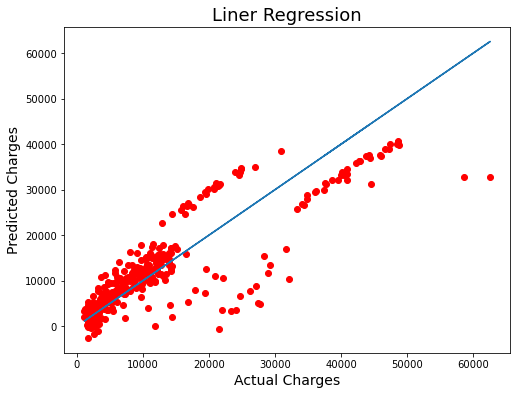

In [49]:
# Linear regression Graph:
plt.figure (figsize=(8,6))
plt.scatter(x=y_test,y=pred_test, color = 'r')
plt.plot(y_test,y_test)
plt.xlabel("Actual Charges", fontsize =14)
plt.ylabel("Predicted Charges", fontsize=14)
plt.title ("Liner Regression", fontsize = 18)
plt.show

In [50]:
#Regularisation
from sklearn.linear_model import Lasso

#Hyperparameter Tuining

parameters = {'alpha':[0.001, 0.01, 0.1,1,10],
             'random_state':list (range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print (clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [51]:
# Lasso Training
ls= Lasso(alpha=10, random_state=0)
model_selection(lr,x_train,y_train,x_test,y_test)

Acuraccy of training model : 0.760034740122902
Accuracy of testing model : 0.7232671352835749


In [52]:
#Decision Tree
dtr = DecisionTreeRegressor()

In [53]:
model_selection(dtr,x_train,y_train,x_test,y_test)

Acuraccy of training model : 0.9987271627453825
Accuracy of testing model : 0.6259356249981934


In [54]:
# Hyperparameter Tuning :

parameters = {'max_features':['auto','sqrt','log2'],
    'max_depth': range(8,12),
    'min_samples_leaf': range(2,5),
    'min_samples_split':range(3,6)
    }

clf = GridSearchCV(dtr,parameters)
clf.fit(x_train,y_train)
print (clf.best_params_)

{'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 4}


In [55]:
dt1 = DecisionTreeRegressor(max_depth = 8, min_samples_leaf = 4, min_samples_split = 3, max_features="auto")

In [56]:
model_selection(dt1,x_train,y_train,x_test,y_test)

Acuraccy of training model : 0.9183253224574325
Accuracy of testing model : 0.7872639191012205


In [57]:
#Random Forest 
rf= RandomForestRegressor()

In [58]:
model_selection(rf,x_train,y_train,x_test,y_test)

Acuraccy of training model : 0.9758597535320801
Accuracy of testing model : 0.8102914452756


In [59]:
# Hyperparameter Tuning:
parameters = {'n_estimators':range(25,30),
    'max_features':['auto','sqrt','log2'],
    'max_depth': range(8,12),
    'min_samples_leaf': range(2,5),
    'min_samples_split':range(3,6)
    }

clf = GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print (clf.best_params_)

{'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 29}


In [60]:
#Random Forest
rf1= RandomForestRegressor(n_estimators=29,max_features='auto', max_depth = 8, min_samples_leaf = 4, min_samples_split = 3)

In [61]:
model_selection(rf1,x_train,y_train,x_test,y_test)

Acuraccy of training model : 0.9128030635141609
Accuracy of testing model : 0.8425841806479291


In [62]:
#Since RandomForest Regressor is giving the best accuracy(r2 score) I select RamdomForest to predict the Insurance charges

In [63]:
# Saving Model
import pickle
filename= 'M_Insurance.pkl'
pickle.dump(rf1,open(filename, 'wb'))

In [64]:
#Conclusion
a= np.array(y_test)
predicted=np.array (rf1.predict(x_test))
df = pd.DataFrame({"Orignal":a, "Predicted":predicted}, index = range(len(a)))
df

,Orignal,Predicted
0,44260.74990,46061.603875
1,7445.91800,8336.736622
2,7046.72220,6854.595821
3,12268.63225,13381.550530
4,28287.89766,16334.931628
...,...,...
324,3309.79260,7918.204913
325,32108.66282,8802.823632
326,14235.07200,21751.668216
327,21098.55405,23677.315893
